In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats import pearsonr

In [2]:
import pandas as pd
from IPython.display import display

DATA_DIR = r"Y:\Studium\3. Sem UniPI\Data Analytics 4 digital Health\Data"

DATASETS = {
    "heart_diagnoses_1": "heart_diagnoses_1.csv",
    "laboratory_events_codes_2": "laboratory_events_codes_2.csv",
    "microbiology_events_codes_3": "microbiology_events_codes_3.csv",
    "procedure_code_4": "procedure_code_4.csv",
}

df = pd.read_csv(f"{DATA_DIR}/{DATASETS['heart_diagnoses_1']}", index_col=False)

In [3]:
df.columns

Index(['note_id', 'subject_id', 'hadm_id', 'note_type', 'note_seq',
       'charttime', 'storetime', 'HPI', 'physical_exam', 'chief_complaint',
       'invasions', 'X-ray', 'CT', 'Ultrasound', 'CATH', 'ECG', 'MRI',
       'reports', 'subject_id_dx', 'icd_code', 'long_title', 'gender', 'age',
       'anchor_year', 'dod'],
      dtype='object')

# INspections

## A

In [110]:
df.head(10)

,note_id,subject_id,hadm_id,note_type,note_seq,charttime,storetime,HPI,physical_exam,chief_complaint,...,ECG,MRI,reports,subject_id_dx,icd_code,long_title,gender,age,anchor_year,dod
0,10000980-DS-20,10000980,29654838,DS,20,2188-01-06 03:00:00,2188-01-07 23:49:00,":\n___ yo woman with h/o hypertension, hyperli...","Admission exam:\nGENERAL- Oriented x3. Mood, a...",\nShortness of breath\n \n,...,['___ 7:56:06 ___ \nBaseline artifact. Sinus...,[],Sinus bradycardia with sinus arrhythmia | Prol...,10000980,I50,Heart failure,F,75.0,2186.0,2193-08-26
1,10000980-DS-21,10000980,26913865,DS,21,2189-07-04 03:00:00,2189-07-04 22:50:00,":\nThis is a ___ M with history of diabetes, d...",ADMISSION EXAM:\nGeneral- appears comfortable...,\ndyspnea\n \n,...,[],[],Sinus bradycardia with sinus arrhythmia | Prol...,10000980,I21,Acute myocardial infarction,F,75.0,2186.0,2193-08-26
2,10002013-DS-8,10002013,24760295,DS,8,2160-07-13 03:00:00,2160-07-15 16:59:00,":\n___ w/ PMH of CAD s/p PCI x3, s/p off-pump ...",Admission:\nVS- T 99.4 BP 157/88 HR 118 RR 24 ...,\nchest pain\n \n,...,['on admission- Sinus tachycardia. Extensive S...,[],Sinus tachycardia | Extensive ST-T changes may...,10002013,I21,Acute myocardial infarction,NaN,NaN,NaN,NaN
3,10002155-DS-8,10002155,23822395,DS,8,2129-08-19 03:00:00,2129-08-20 15:29:00,:\n___ is a ___ yo female with a past medical ...,"GENERAL: WDWN in NAD. Oriented x3. Mood, affec...",\nchest pressure\n \n,...,[': new LBBB with STE in V1 -V3 & V5 that in ...,[],*** CONSIDER ACUTE ST ELEVATION MI *** | Sinus...,10002155,I21,Acute myocardial infarction,NaN,NaN,NaN,NaN
4,10004457-DS-10,10004457,28723315,DS,10,2141-08-14 03:00:00,2141-08-14 21:50:00,:\nMr. ___ is a ___ with a hx of CAD (s/p DES ...,On Admission:\nVS- 97.8 157/64 101 18 98% RA \...,"\nAbnormal Stress Test, New AI\n \n",...,['(see exercise report for details). Resting s...,[],Sinus rhythm | Normal ECG,10004457,I35,Nonrheumatic aortic valve disorders,M,66.0,2140.0,NaN
5,10007058-DS-2,10007058,22954658,DS,2,2167-11-12 03:00:00,2167-11-13 14:39:00,:\nMr. ___ is a healthy ___ year-old male who ...,ADMISSION PHYSICAL EXAM:\n====================...,\nChest pain\n \n,...,"['(___): \nNSR, nl axis, no ST changes']",[],"Age not entered, assumed to be 50 years old f...",10007058,I21,Acute myocardial infarction,M,48.0,2167.0,NaN
6,10010424-DS-9,10010424,28388172,DS,9,2164-05-31 03:00:00,2164-06-24 13:20:00,:\nThis is a ___ year old male in his USOH wit...,VS: T=AF BP=127/69 HR= 72 RR=20 O2 sat= 98 \n...,\nDOE and Chest pressure\n \n,...,[],[],--- Warning: Data quality may affect interpret...,10010424,I25,Chronic ischemic heart disease,NaN,NaN,NaN,NaN
7,10012343-DS-3,10012343,27658045,DS,3,2146-03-22 03:00:00,2146-03-23 16:42:00,:\n___ F with h/o gastric bypass surgery prese...,VS: 97.9 104/70 60 16 99% on 2L \nGENERAL: NA...,\nchest pain\n \n,...,"[': NSR @58, LAD, Q in III, biphasic TW in V3-...",[],Sinus bradycardia with PVC(s) | Prolonged QT i...,10012343,I21,Acute myocardial infarction,NaN,NaN,NaN,NaN
8,10013569-DS-9,10013569,22891949,DS,9,2167-11-15 03:00:00,2167-11-18 21:36:00,:\n___ w/ PMH significant for CHF (LVEF 30% in...,"Admission:\n97.3, 145/79, 76, 20, 96% 2L nc. W...",\nDyspnea\n \n,...,[': Atrial sensing and ventricular pacing whic...,[],Ventricular pacing | Pacemaker rhythm - no fur...,10013569,I50,Heart failure,NaN,NaN,NaN,NaN
9,10014651-DS-4,10014651,20051301,DS,4,2138-05-01 03:00:00,2138-05-03 19:23:00,":\n___ is a ___ year old woman with HTN, HLD, ...",=======================\nADMISSION PHYSICAL EX...,"\nLeg swelling, dyspnea on exertion, orthopnea...",...,[],['I\nFINDINGS\n- Left Atrium ___ Veins (PV): M...,Sinus tachycardia. | Leftward axis | Inferior ...,10014651,I50,Heart failure,NaN,NaN,NaN,NaN


In [104]:
df.tail(10)


,note_id,subject_id,hadm_id,note_type,note_seq,charttime,storetime,HPI,physical_exam,chief_complaint,...,ECG,MRI,reports,subject_id_dx,icd_code,long_title,gender,age,anchor_year,dod
4854,10473769-DS-7,19998591,28160486,DS,7,2154-08-16 03:00:00,2154-08-16 18:22:00,":\n___ y/o woman with no known CAD, hx of htn,...",GENERAL: Anxious appearing elderly woman with ...,\nChest Pain\n \n,...,"[': \n___: NSR at ___hanges, small Q waves in...",[],Sinus rhythm. | ST junctional depression is no...,10473769,I21,Acute myocardial infarction,NaN,NaN,NaN,NaN
4855,17451560-DS-31,19998592,26305582,DS,31,2132-04-13 03:00:00,2132-04-14 01:52:00,":\n___ with CHFpEF, hypertension, paroxysmal a...",ADMISSION PHYSICAL EXAM: \nVS: 97.7 151/92 ...,\nBradycardia\n \n,...,['(___):\nno p-wave activity with regular vent...,[],Sinus bradycardia | Left axis deviation - ante...,17451560,I49,Other cardiac arrhythmias,NaN,NaN,NaN,NaN
4856,11984732-DS-17,19998593,20724148,DS,17,2119-02-26 03:00:00,2119-02-27 11:13:00,":\n___ w/PMHx significant for ___, CAD s/p CAB...","ADMISSION PHYSICAL EXAM:\nVS: T: 98.6, BP: 116...","\nSOB, fatigue\n \n",...,['___: Baseline artifact. Probable sinus or ec...,[],Possible ectopic atrial bradycardia | Right bu...,11984732,I44,Atrioventricular and left bundle-branch block,NaN,NaN,NaN,NaN
4857,10232096-DS-10,19998594,21324713,DS,10,2126-11-23 03:00:00,2126-11-24 11:04:00,:\n___ YO M w critical AS and CRI who presente...,ADMISSION\nVS: 95.8 102/58 72 20 99%2L 68 kg ...,\nchest pain \n \n,...,[],[],Sinus rhythm with 1st degree A-V block | Left ...,10232096,I35,Nonrheumatic aortic valve disorders,NaN,NaN,NaN,NaN
4858,12801290-DS-9,19998595,22746992,DS,9,2149-08-21 03:00:00,2149-08-23 15:40:00,:\n___ yo M with hx of ischemic cardiomyopathy...,admission exam \nVS: T: 96.8 BP: 111/92 HR: 64...,\nweakness\n \n,...,['___\nSinus rhythm. Baseline artifact makes i...,[],Possible ectopic atrial rhythm | Left axis dev...,12801290,I50,Heart failure,NaN,NaN,NaN,NaN
4859,13690559-DS-19,19998596,24860241,DS,19,2180-01-24 03:00:00,2180-01-24 20:12:00,:\nMs ___ is a ___ year old woman with carotid...,ADMISSION EXAM\n=====================\nVITALS:...,\nRight shoulder pain\n \n,...,['___:\nAtrial flutter with 4:1 conduction and...,[],Possible atrial flutter with rapid ventricular...,13690559,I48,Atrial fibrillation and flutter,NaN,NaN,NaN,NaN
4860,14997789-DS-12,19998597,23720781,DS,12,2131-10-11 03:00:00,2131-10-11 16:17:00,:\nMs. ___ is a ___ woman with renal cell carc...,Physical Exam:\nVS: T: T 95.7 bp 102/60 HR 1...,\nDyspnea\n \n,...,[],[],Sinus tachycardia. | Possible anterior infarct...,14997789,I31,Other diseases of pericardium,NaN,NaN,NaN,NaN
4861,10754991-DS-13,19998598,26940500,DS,13,2135-04-03 03:00:00,2135-04-05 00:12:00,":\n___ T2DM, fibromyalgia, GERD, hypothyroidis...",=================\nADMISSION EXAM:\n==========...,\nPalpitations\n \n,...,['(___): Narrow complex tachycardia. Supravent...,[],Supraventricular tachycardia | Sinus rhythm | ...,10754991,I47,Paroxysmal tachycardia,NaN,NaN,NaN,NaN
4862,17922874-DS-8,19998599,20343031,DS,8,2158-05-23 03:00:00,2158-05-23 20:55:00,":\n___ with H/O of type 2 diabetes mellitus, h...","General: Middle aged Caucasian man in NAD, com...","\nAbdominal pain, nausea, vomiting, and diarrh...",...,['Study Date of ___ 7:51:52 ___\nSinus rhythm ...,[],*** CONSIDER ACUTE ST ELEVATION MI *** | Sinus...,17922874,I30,Acute pericarditis,NaN,NaN,NaN,NaN
4863,16877397-DS-10,19998600,21593455,DS,10,2155-11-27 03:00:00,2155-12-07 18:35:00,:\nThe patient is an ___ year old male with a ...,"On admission\nVS: T 97.7, BP 134/73, HR 73, RR...",\nchest pain and dyspnea\n \n,...,[],[],Sinus rhythm | Leftward axis | Lateral ST elev...,16877397,I35,Nonrheumatic aortic valve disorders,NaN,NaN,NaN,NaN


## B

In [129]:
df.columns

Index(['note_id', 'subject_id', 'hadm_id', 'note_type', 'note_seq',
       'charttime', 'storetime', 'HPI', 'physical_exam', 'chief_complaint',
       'invasions', 'X-ray', 'CT', 'Ultrasound', 'CATH', 'ECG', 'MRI',
       'reports', 'subject_id_dx', 'icd_code', 'long_title', 'gender', 'age',
       'anchor_year', 'dod'],
      dtype='object')

In [130]:
df[df.columns[:10]].head(10)

,note_id,subject_id,hadm_id,note_type,note_seq,charttime,storetime,HPI,physical_exam,chief_complaint
0,10000980-DS-20,10000980,29654838,DS,20,2188-01-06 03:00:00,2188-01-07 23:49:00,":\n___ yo woman with h/o hypertension, hyperli...","Admission exam:\nGENERAL- Oriented x3. Mood, a...",\nShortness of breath\n \n
1,10000980-DS-21,10000980,26913865,DS,21,2189-07-04 03:00:00,2189-07-04 22:50:00,":\nThis is a ___ M with history of diabetes, d...",ADMISSION EXAM:\nGeneral- appears comfortable...,\ndyspnea\n \n
2,10002013-DS-8,10002013,24760295,DS,8,2160-07-13 03:00:00,2160-07-15 16:59:00,":\n___ w/ PMH of CAD s/p PCI x3, s/p off-pump ...",Admission:\nVS- T 99.4 BP 157/88 HR 118 RR 24 ...,\nchest pain\n \n
3,10002155-DS-8,10002155,23822395,DS,8,2129-08-19 03:00:00,2129-08-20 15:29:00,:\n___ is a ___ yo female with a past medical ...,"GENERAL: WDWN in NAD. Oriented x3. Mood, affec...",\nchest pressure\n \n
4,10004457-DS-10,10004457,28723315,DS,10,2141-08-14 03:00:00,2141-08-14 21:50:00,:\nMr. ___ is a ___ with a hx of CAD (s/p DES ...,On Admission:\nVS- 97.8 157/64 101 18 98% RA \...,"\nAbnormal Stress Test, New AI\n \n"
5,10007058-DS-2,10007058,22954658,DS,2,2167-11-12 03:00:00,2167-11-13 14:39:00,:\nMr. ___ is a healthy ___ year-old male who ...,ADMISSION PHYSICAL EXAM:\n====================...,\nChest pain\n \n
6,10010424-DS-9,10010424,28388172,DS,9,2164-05-31 03:00:00,2164-06-24 13:20:00,:\nThis is a ___ year old male in his USOH wit...,VS: T=AF BP=127/69 HR= 72 RR=20 O2 sat= 98 \n...,\nDOE and Chest pressure\n \n
7,10012343-DS-3,10012343,27658045,DS,3,2146-03-22 03:00:00,2146-03-23 16:42:00,:\n___ F with h/o gastric bypass surgery prese...,VS: 97.9 104/70 60 16 99% on 2L \nGENERAL: NA...,\nchest pain\n \n
8,10013569-DS-9,10013569,22891949,DS,9,2167-11-15 03:00:00,2167-11-18 21:36:00,:\n___ w/ PMH significant for CHF (LVEF 30% in...,"Admission:\n97.3, 145/79, 76, 20, 96% 2L nc. W...",\nDyspnea\n \n
9,10014651-DS-4,10014651,20051301,DS,4,2138-05-01 03:00:00,2138-05-03 19:23:00,":\n___ is a ___ year old woman with HTN, HLD, ...",=======================\nADMISSION PHYSICAL EX...,"\nLeg swelling, dyspnea on exertion, orthopnea..."


In [131]:
df[df.columns[10:]].head(10)

,invasions,X-ray,CT,Ultrasound,CATH,ECG,MRI,reports,subject_id_dx,icd_code,long_title,gender,age,anchor_year,dod
0,\nNone\n \n,"['___:', 'views of the chest demonstrate low l...",[],['___:\nThe left atrium is mildly dilated. The...,[],['___ 7:56:06 ___ \nBaseline artifact. Sinus...,[],Sinus bradycardia with sinus arrhythmia | Prol...,10000980,I50,Heart failure,F,75.0,2186.0,2193-08-26
1,\nCardiac catheterization ___\n\n \n,[': ___\nRight upper lobe pneumonia or mass. ...,['CHEST: ___\n1. Diffuse confluent ground-gla...,[': ___\nThe left atrium is elongated. There i...,[': ___\n1. Selective coronary angiography of ...,[],[],Sinus bradycardia with sinus arrhythmia | Prol...,10000980,I21,Acute myocardial infarction,F,75.0,2186.0,2193-08-26
2,\ncardiac catheterization\n\n \n,['___- New moderate left pleural effusion with...,['Chest ___. No CT evidence for pulmonary emb...,[],['___. Selective coronary angiography of this ...,['on admission- Sinus tachycardia. Extensive S...,[],Sinus tachycardia | Extensive ST-T changes may...,10002013,I21,Acute myocardial infarction,NaN,NaN,NaN,NaN
3,\nCardiac cathetherization\n\n \n,[],"['anteriorly, no \ncrackles, wheezes or rhonch...",[],[': \nLMCA: 40% distal\nLAD: Occluded difficu...,[': new LBBB with STE in V1 -V3 & V5 that in ...,[],*** CONSIDER ACUTE ST ELEVATION MI *** | Sinus...,10002155,I21,Acute myocardial infarction,NaN,NaN,NaN,NaN
4,\nNone\n \n,[],['/MR or TEE is suggested to \nevaluate for po...,[': \nAnginal type symptoms with borderline i...,[],['(see exercise report for details). Resting s...,[],Sinus rhythm | Normal ECG,10004457,I35,Nonrheumatic aortic valve disorders,M,66.0,2140.0,NaN
5,\n___ - Percutaneous coronary intervention wit...,['___:\nLungs are fully expanded and clear. C...,['___:\n1. Infrarenal abdominal aortic aneury...,['(___): \nThe left atrium is mildly dilated....,['(___): RCA occluded with thrombus in mid- t...,"['(___): \nNSR, nl axis, no ST changes']",[],"Age not entered, assumed to be 50 years old f...",10007058,I21,Acute myocardial infarction,M,48.0,2167.0,NaN
6,\nCardiac catheterization\n\n \n,[],"['anteriorly. No \ncrackles, wheezes or rhonch...",[':\nThe left atrium is mildly dilated. Left v...,"['COMMENTS: \n1.', '. \nNow with femoral...",[],[],--- Warning: Data quality may affect interpret...,10010424,I25,Chronic ischemic heart disease,NaN,NaN,NaN,NaN
7,\nCardiac catheterization with stending of the...,[],[],['(Complete) Done ___ at 8:25:18 AM The left a...,"['Study Date of ___ 1. Selective', ""of this ri...","[': NSR @58, LAD, Q in III, biphasic TW in V3-...",[],Sinus bradycardia with PVC(s) | Prolonged QT i...,10012343,I21,Acute myocardial infarction,NaN,NaN,NaN,NaN
8,\nnone\n\n \n,[': IMPRESSION: Enlarged cardiac silhouette ...,[],[': There is mild symmetric left ventricular h...,[],[': Atrial sensing and ventricular pacing whic...,[],Ventricular pacing | Pacemaker rhythm - no fur...,10013569,I50,Heart failure,NaN,NaN,NaN,NaN
9,\nNone\n(Left Heart Catheterization at ___\n \n,[],['CHEST WITHOUT CONTRAST\n\nFINDINGS: \nTHORAC...,['The left atrial volume index is moderately i...,[],[],['I\nFINDINGS\n- Left Atrium ___ Veins (PV): M...,Sinus tachycardia. | Leftward axis | Inferior ...,10014651,I50,Heart failure,NaN,NaN,NaN,NaN


## C

In [72]:
df.columns

Index(['subject_id', 'hadm_id', 'note_type', 'note_seq', 'charttime',
       'storetime', 'HPI', 'physical_exam', 'chief_complaint', 'invasions',
       'X-ray', 'CT', 'Ultrasound', 'CATH', 'ECG', 'MRI', 'reports',
       'subject_id_dx', 'icd_code', 'long_title', 'gender', 'age',
       'anchor_year', 'dod'],
      dtype='object')

In [73]:
df["note_type"].unique()

array(['DS'], dtype=object)

In [4]:
nan_row = df[df['subject_id'] == 19998591]
nan_row

,note_id,subject_id,hadm_id,note_type,note_seq,charttime,storetime,HPI,physical_exam,chief_complaint,...,ECG,MRI,reports,subject_id_dx,icd_code,long_title,gender,age,anchor_year,dod
4854,10473769-DS-7,19998591,28160486,DS,7,2154-08-16 03:00:00,2154-08-16 18:22:00,":\n___ y/o woman with no known CAD, hx of htn,...",GENERAL: Anxious appearing elderly woman with ...,\nChest Pain\n \n,...,"[': \n___: NSR at ___hanges, small Q waves in...",[],Sinus rhythm. | ST junctional depression is no...,10473769,I21,Acute myocardial infarction,NaN,NaN,NaN,NaN


In [65]:
nan_row = df[df['subject_id'] == 19998591]
nan_row

,subject_id,hadm_id,note_type,note_seq,charttime,storetime,HPI,physical_exam,chief_complaint,invasions,...,ECG,MRI,reports,subject_id_dx,icd_code,long_title,gender,age,anchor_year,dod
note_id,,,,,,,,,,,,,,,,,,,,,
10473769-DS-7,19998591,28160486,DS,7,2154-08-16 03:00:00,2154-08-16 18:22:00,":\n___ y/o woman with no known CAD, hx of htn,...",GENERAL: Anxious appearing elderly woman with ...,\nChest Pain\n \n,\nCARDIAC CATH ___: \nLMCA: No CAD\nLAD: Mid ...,...,"[': \n___: NSR at ___hanges, small Q waves in...",NaN,Sinus rhythm. | ST junctional depression is no...,10473769,I21,Acute myocardial infarction,NaN,NaN,<NA>,NaT


# Data Understanding and Preprocessing, cleaning of DF1 - heart

In [134]:
df.duplicated().sum()

np.int64(0)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4864 entries, 0 to 4863
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   note_id          4864 non-null   object 
 1   subject_id       4864 non-null   int64  
 2   hadm_id          4864 non-null   int64  
 3   note_type        4864 non-null   object 
 4   note_seq         4864 non-null   int64  
 5   charttime        4864 non-null   object 
 6   storetime        4864 non-null   object 
 7   HPI              4864 non-null   object 
 8   physical_exam    4864 non-null   object 
 9   chief_complaint  4852 non-null   object 
 10  invasions        4852 non-null   object 
 11  X-ray            4864 non-null   object 
 12  CT               4864 non-null   object 
 13  Ultrasound       4864 non-null   object 
 14  CATH             4864 non-null   object 
 15  ECG              4864 non-null   object 
 16  MRI              4864 non-null   object 
 17  reports       

## Findings

FIRST Findings:
- gender, age anchor_year and dod, invasions, chief_complaint with NANs => they are only is this DF so we can handle them before merging
- some dtyppes need conversions: chart/storetimes, dod?
- age, acnor year, are int64 but with .0
- find and convert weird Nones: \nNone\n\n \nnone\n, [], 
['.']                                                                                                                   

## Check for wrong NaNs / non typical entries in each column

PLAN:
- first remove all "\n" and whitespaces
- then find occurences of wrong NaNS, and convert them to np.na

In [5]:
# Simple cleanup: remove newlines and extra whitespaces
def clean_whitespace(val):
    if isinstance(val, str):
        return val.replace('\n', '').replace('\r', '').strip()
    return val

for col in df.columns:
    df[col] = df[col].apply(clean_whitespace)

print("Whitespace cleanup completed")
df.info()

Whitespace cleanup completed
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4864 entries, 0 to 4863
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   note_id          4864 non-null   object 
 1   subject_id       4864 non-null   int64  
 2   hadm_id          4864 non-null   int64  
 3   note_type        4864 non-null   object 
 4   note_seq         4864 non-null   int64  
 5   charttime        4864 non-null   object 
 6   storetime        4864 non-null   object 
 7   HPI              4864 non-null   object 
 8   physical_exam    4864 non-null   object 
 9   chief_complaint  4852 non-null   object 
 10  invasions        4852 non-null   object 
 11  X-ray            4864 non-null   object 
 12  CT               4864 non-null   object 
 13  Ultrasound       4864 non-null   object 
 14  CATH             4864 non-null   object 
 15  ECG              4864 non-null   object 
 16  MRI              4864 non-null 

#### Find wrong NaNs

In [20]:
# compute and display value counts for every column (including NaNs)
value_counts_dict = {}

for col in df.columns:
    vc = df[col].value_counts(dropna=False)
    value_counts_dict[col] = vc
    print(f"\nColumn: '{col}'  | unique={vc.shape[0]}  | missing={df[col].isna().sum()}")
    # check the column's dtype (not the column name string)
    if not pd.api.types.is_numeric_dtype(df[col]) and col not in ["subject_id", "hadm_id", "note_id","charttime", "storetime", "dod"]:
        uniques = []
        for uni in df[col].unique():
            s = str(uni)
            if len(s) < 10:
                uniques.append(s)
        print(f"  sus Unique values: {uniques}")


Column: 'note_id'  | unique=4761  | missing=0

Column: 'subject_id'  | unique=4392  | missing=0

Column: 'hadm_id'  | unique=4761  | missing=0

Column: 'note_type'  | unique=1  | missing=0
  sus Unique values: ['DS']

Column: 'note_seq'  | unique=64  | missing=0

Column: 'charttime'  | unique=4466  | missing=0

Column: 'storetime'  | unique=4761  | missing=0

Column: 'HPI'  | unique=4760  | missing=0
  sus Unique values: []

Column: 'physical_exam'  | unique=4749  | missing=0
  sus Unique values: []

Column: 'chief_complaint'  | unique=1937  | missing=12
  sus Unique values: ['dyspnea', 'Dyspnea', 'Angina', 'lethargy', 'NSTEMI', 'tamponade', 'Syncope', 'Fall', 'SOB', 'VT storm', 'Vomiting', 'leg pain', 'nan', 'STEMI', 'DOE', 'hypoxia', 'Back pain', 'Weakness', 'angina', 'syncope', 'Fatigue', '___.', 'Cough', 'Hypoxia', '___ edema', 's/p STEMI', '___', 'hypoxemia', 'malaise', 'Fever', 'weakness', 'VTach', 'CP', 'Diarrhea', 'torsades', 'VF arrest', 'CHF', 's/p fall', 'SVT', 'Cough/SOB',

Findings - we found:
- TODO: ___ (e.g.: "['___']"s, ['___:']) is just anonymized, not a NaN IMO so we keep them?
- TODO: Also what about weird entries (e.g.:  "['or']", "xxxxxx", '***', )?

Safe wrong nans:
- to nan every non numeric col which is exactly "['-']", "['/']", "['.']", "[]", "['/']", "[':']", ...
- to np.NaN every non numeric, to_lower, column with ["none", "nan", "na", "N/A", "." ] in its entry

In [23]:
sus_entries = ['', '\nNone\n \n', 'none', 'None.', "None..", "na", 'nan', 'null', '[\'.\']', '[]', '.', 'NaT', 'n/a', 'na', 'not available',"pd.na", "<nat>", "['-']", "['/']", "['.']", "[]", "['/']", "[':']"]
for col in df.columns:
    print(f"Column '{col}'")
    for entry in sus_entries:
        if entry.strip():  # skip empty string for .isin() check
            mask = df[col].astype(str).str.lower().str.contains(entry.lower(), regex=False, na=False)
        else:
            mask = df[col].astype(str).str.strip() == ''
        
        cnt = mask.sum()
        if cnt > 0:
            print(f"  '{entry}': {cnt} occurrences")

Column 'note_id'
Column 'subject_id'
Column 'hadm_id'
Column 'note_type'
Column 'note_seq'
Column 'charttime'
Column 'hadm_id'
Column 'note_type'
Column 'note_seq'
Column 'charttime'
Column 'storetime'
Column 'HPI'
  'none': 152 occurrences
  'None.': 8 occurrences
  'na': 4578 occurrences
  'nan': 229 occurrences
  '[]': 15 occurrences
  '.': 4862 occurrences
  'NaT': 755 occurrences
Column 'storetime'
Column 'HPI'
  'none': 152 occurrences
  'None.': 8 occurrences
  'na': 4578 occurrences
  'nan': 229 occurrences
  '[]': 15 occurrences
  '.': 4862 occurrences
  'NaT': 755 occurrences
  'n/a': 25 occurrences
  'na': 4578 occurrences
  'not available': 18 occurrences
  '[]': 15 occurrences
Column 'physical_exam'
  'n/a': 25 occurrences
  'na': 4578 occurrences
  'not available': 18 occurrences
  '[]': 15 occurrences
Column 'physical_exam'
  'none': 126 occurrences
  'None.': 4 occurrences
  'None..': 1 occurrences
  'na': 3824 occurrences
  'nan': 19 occurrences
  '[]': 96 occurrences


### INspect weird entries
Findings - we found:
- TODO: ___ (e.g.: "['___']"s, ['___:']) is just anonymized, not a NaN IMO so we keep them?
- TODO: Also what about weird entries (e.g.:  "['or']", "xxxxxx", '***', )?

==> IMO remove bc we risk low quality data with wrong outliers

In [6]:
df.columns

Index(['note_id', 'subject_id', 'hadm_id', 'note_type', 'note_seq',
       'charttime', 'storetime', 'HPI', 'physical_exam', 'chief_complaint',
       'invasions', 'X-ray', 'CT', 'Ultrasound', 'CATH', 'ECG', 'MRI',
       'reports', 'subject_id_dx', 'icd_code', 'long_title', 'gender', 'age',
       'anchor_year', 'dod'],
      dtype='object')

In [7]:
weird_entries = ['or', 'xxxxxx', '***', '-', '/', '.', ':', "['.']", "['or']", "['xxxxxx']", "['***']", "['-']", "['/']", "[':']"]

# For each column, find and display rows with weird entries
for col in df.columns:
    if col in ['subject_id', 'hadm_id', 'note_id', 'charttime', 'storetime', 'dod']:
        continue
    
    str_col = df[col].astype(str).str.lower()
    
    for entry in weird_entries:
        # Check for exact bracket format or loose match
        mask = (str_col == f"['{entry}']") | (str_col == f"[{entry}]") | (str_col == entry)
        
        if mask.sum() > 0:
            print(f"\n{'='*80}")
            print(f"Column '{col}' | Entry: '{entry}' | Found: {mask.sum()} rows")
            print(f"{'='*80}")
            display(df[mask][[col, 'subject_id', 'hadm_id' , 'HPI', 'X-ray', 'CT', 'Ultrasound', 'CATH', 'ECG', 'MRI', 'icd_code', 'gender', 'age',]].head(10))


Column 'invasions' | Entry: 'xxxxxx' | Found: 1 rows


,invasions,subject_id,hadm_id,HPI,X-ray,CT,Ultrasound,CATH,ECG,MRI,icd_code,gender,age
4561,xxxxxx,19613127,29371998,":___ yo M with history of CABG ___ ___, DM, re...","[':\nCHEST, AP UPRIGHT: Lungs are clear. Cha...",[],['The left atrium is normal ___ size. No atria...,['Findings \nESTIMATED blood loss: <40 cc \n...,[],[],I21,NaN,NaN



Column 'invasions' | Entry: '***' | Found: 1 rows


,invasions,subject_id,hadm_id,HPI,X-ray,CT,Ultrasound,CATH,ECG,MRI,icd_code,gender,age
1444,***,13000446,21786912,:The patient is a ___ y/o man with a history o...,"[': Notable for RLL and LLL opacities', ""FINDI...",['CHEST W/O CONTRAST Study Date of ___ 1:30 __...,[],[],"[': Atrial Fibrillation, otherwise unchanged\n...",[],I50,NaN,NaN



Column 'invasions' | Entry: '.' | Found: 1 rows


,invasions,subject_id,hadm_id,HPI,X-ray,CT,Ultrasound,CATH,ECG,MRI,icd_code,gender,age
4123,.,18658392,20046985,":___ with a history of 3-vessel CABG in ___, C...",['___: Dictated report: No mediastinal widenin...,[],['___:'],['___: \nSelective coronary angiography in thi...,"[': NSR, 1mm STE in V2, subtle 0.25-0.5 STE in...",[],I21,NaN,NaN



Column 'CT' | Entry: 'or' | Found: 1 rows


,CT,subject_id,hadm_id,HPI,X-ray,CT,Ultrasound,CATH,ECG,MRI,icd_code,gender,age
3505,['or'],17390272,21500884,:Mr. ___ is a ___ y/o man with a PMH of stage ...,['___. \nApproved \nComparison to ___. ...,['or'],['The left atrium is normal ___ size. Left ven...,[],['___ ___. \nSinus rhythm with a normal infe...,[],I48,M,71.0



Column 'CT' | Entry: '.' | Found: 7 rows


,CT,subject_id,hadm_id,HPI,X-ray,CT,Ultrasound,CATH,ECG,MRI,icd_code,gender,age
508,['.'],11163793,20185129,:___ with aortic stenosis with worsening short...,[':\nSemi-upright portable radiograph of t...,['.'],[':\nThe left atrium is mildly dilated. The es...,[],[],[],I35,NaN,NaN
787,['.'],11726958,20977007,:___ male with a past medical history of hyper...,['(___)\nIMPRESSION: \nNo radiographic evid...,['.'],"[""(___):\nResults \nMeasurements \nNormal Ra...",[],[],[],I35,M,85.0
940,['.'],11997596,20044448,:admitted from the ED withasymptomatic hypoten...,['___:\nNear complete opacification of the rig...,['.'],['___\nThe estimated right atrial pressure is ...,[],[],[],I31,F,34.0
978,['.'],12075316,21685796,:HISTORY OF PRESENTING ILLNESS: Mr ___ is an _...,['___\nThe pacemaker leads terminate in the ex...,['.'],['___ (from ___):\n\n2. Moderately severe conc...,[],[],[],I50,NaN,NaN
1871,['.'],13933090,29951156,":___ yo male with h/o CAD s/p MI, CABG and PCI...",['on admission: Stable small right pleural eff...,['.'],['on ___: The left atrium is mildly dilated. ...,[],['on admission: Atrial fibrillation with rapid...,[],I21,NaN,NaN
4089,['.'],18579971,28956349,:Ms. ___ is a ___ year old female with CAD s/p...,['___ 5:14 ___\nSingle bedside AP examination ...,['.'],['___: The left atrium is mildly dilated. The ...,[],"['demonstrated NSR at 82 bpm. Nl axis, nl inte...",[],I50,NaN,NaN
4834,['.'],19998571,28956349,:Ms. ___ is a ___ year old female with CAD s/p...,['___ 5:14 ___\nSingle bedside AP examination ...,['.'],['___: The left atrium is mildly dilated. The ...,[],"['demonstrated NSR at 82 bpm. Nl axis, nl inte...",[],I50,NaN,NaN



Column 'CT' | Entry: ':' | Found: 1 rows


,CT,subject_id,hadm_id,HPI,X-ray,CT,Ultrasound,CATH,ECG,MRI,icd_code,gender,age
3698,[':'],17760700,25501463,:___ yo M with a history of asthma and seasona...,[],[':'],"[':\nNo evidence of right groin hematoma, pseu...","[':\n1.', ':\n1.', 'of this right dominant sys...",[],[],I21,NaN,NaN



Column 'CT' | Entry: '['.']' | Found: 7 rows


,CT,subject_id,hadm_id,HPI,X-ray,CT,Ultrasound,CATH,ECG,MRI,icd_code,gender,age
508,['.'],11163793,20185129,:___ with aortic stenosis with worsening short...,[':\nSemi-upright portable radiograph of t...,['.'],[':\nThe left atrium is mildly dilated. The es...,[],[],[],I35,NaN,NaN
787,['.'],11726958,20977007,:___ male with a past medical history of hyper...,['(___)\nIMPRESSION: \nNo radiographic evid...,['.'],"[""(___):\nResults \nMeasurements \nNormal Ra...",[],[],[],I35,M,85.0
940,['.'],11997596,20044448,:admitted from the ED withasymptomatic hypoten...,['___:\nNear complete opacification of the rig...,['.'],['___\nThe estimated right atrial pressure is ...,[],[],[],I31,F,34.0
978,['.'],12075316,21685796,:HISTORY OF PRESENTING ILLNESS: Mr ___ is an _...,['___\nThe pacemaker leads terminate in the ex...,['.'],['___ (from ___):\n\n2. Moderately severe conc...,[],[],[],I50,NaN,NaN
1871,['.'],13933090,29951156,":___ yo male with h/o CAD s/p MI, CABG and PCI...",['on admission: Stable small right pleural eff...,['.'],['on ___: The left atrium is mildly dilated. ...,[],['on admission: Atrial fibrillation with rapid...,[],I21,NaN,NaN
4089,['.'],18579971,28956349,:Ms. ___ is a ___ year old female with CAD s/p...,['___ 5:14 ___\nSingle bedside AP examination ...,['.'],['___: The left atrium is mildly dilated. The ...,[],"['demonstrated NSR at 82 bpm. Nl axis, nl inte...",[],I50,NaN,NaN
4834,['.'],19998571,28956349,:Ms. ___ is a ___ year old female with CAD s/p...,['___ 5:14 ___\nSingle bedside AP examination ...,['.'],['___: The left atrium is mildly dilated. The ...,[],"['demonstrated NSR at 82 bpm. Nl axis, nl inte...",[],I50,NaN,NaN



Column 'CT' | Entry: '['or']' | Found: 1 rows


,CT,subject_id,hadm_id,HPI,X-ray,CT,Ultrasound,CATH,ECG,MRI,icd_code,gender,age
3505,['or'],17390272,21500884,:Mr. ___ is a ___ y/o man with a PMH of stage ...,['___. \nApproved \nComparison to ___. ...,['or'],['The left atrium is normal ___ size. Left ven...,[],['___ ___. \nSinus rhythm with a normal infe...,[],I48,M,71.0



Column 'CT' | Entry: '[':']' | Found: 1 rows


,CT,subject_id,hadm_id,HPI,X-ray,CT,Ultrasound,CATH,ECG,MRI,icd_code,gender,age
3698,[':'],17760700,25501463,:___ yo M with a history of asthma and seasona...,[],[':'],"[':\nNo evidence of right groin hematoma, pseu...","[':\n1.', ':\n1.', 'of this right dominant sys...",[],[],I21,NaN,NaN



Column 'Ultrasound' | Entry: ':' | Found: 2 rows


,Ultrasound,subject_id,hadm_id,HPI,X-ray,CT,Ultrasound,CATH,ECG,MRI,icd_code,gender,age
1387,[':'],12881289,27293872,:Mr. ___ is a ___ gentleman with history of CH...,['S: Cardiomegaly is not changed. \nThere is \...,[],[':'],[],[':\nSinus bradycardia. Left anterior fascicul...,[],I50,NaN,NaN
3665,[':'],17689835,22966211,:___ year old male with a prior CAD history wh...,[],[': No significant carotid \nartery stenosis (...,[':'],[': 1. Selective coronary angiography in this ...,[],[],I25,NaN,NaN



Column 'Ultrasound' | Entry: '[':']' | Found: 2 rows


,Ultrasound,subject_id,hadm_id,HPI,X-ray,CT,Ultrasound,CATH,ECG,MRI,icd_code,gender,age
1387,[':'],12881289,27293872,:Mr. ___ is a ___ gentleman with history of CH...,['S: Cardiomegaly is not changed. \nThere is \...,[],[':'],[],[':\nSinus bradycardia. Left anterior fascicul...,[],I50,NaN,NaN
3665,[':'],17689835,22966211,:___ year old male with a prior CAD history wh...,[],[': No significant carotid \nartery stenosis (...,[':'],[': 1. Selective coronary angiography in this ...,[],[],I25,NaN,NaN



Column 'CATH' | Entry: 'or' | Found: 1 rows


,CATH,subject_id,hadm_id,HPI,X-ray,CT,Ultrasound,CATH,ECG,MRI,icd_code,gender,age
698,['or'],11523129,24110689,":___ with PMH of CHF, DM2, HTN, and pseudogout...",[],[],['___\nhe left atrium is elongated. The estima...,['or'],[],['I is recommended if \nclinically indicated f...,I50,F,77.0



Column 'CATH' | Entry: '['or']' | Found: 1 rows


,CATH,subject_id,hadm_id,HPI,X-ray,CT,Ultrasound,CATH,ECG,MRI,icd_code,gender,age
698,['or'],11523129,24110689,":___ with PMH of CHF, DM2, HTN, and pseudogout...",[],[],['___\nhe left atrium is elongated. The estima...,['or'],[],['I is recommended if \nclinically indicated f...,I50,F,77.0



Column 'ECG' | Entry: '-' | Found: 1 rows


,ECG,subject_id,hadm_id,HPI,X-ray,CT,Ultrasound,CATH,ECG,MRI,icd_code,gender,age
2539,['-'],15299366,20927864,":___ yoM with PMHx of CKD, HTN, hypothyroidism...",['___\nFINDINGS: \nModerate cardiomegaly is mi...,[],['showing ST segment changes in the presence \...,[],['-'],[],I50,M,74.0



Column 'ECG' | Entry: '/' | Found: 2 rows


,ECG,subject_id,hadm_id,HPI,X-ray,CT,Ultrasound,CATH,ECG,MRI,icd_code,gender,age
3112,['/'],16500918,29563225,":___ F with mild cognitive impairment,afib s/p...",['___\nIMPRESSION: \nInterval decrease in righ...,['CHEST ___\nIMPRESSION: \nNo evidence of pulm...,['___\nIMPRESSION: No significant ischemic ECG...,[],['/'],[],I50,NaN,NaN
3721,['/'],17848467,21582547,:___ yo M with Hx CAD (Ant MI in ___ s/p PCI w...,"['___: The cardiac, mediastinal and hilar \nco...",[],['___:\nINTERPRETATION: This ___ yo man s/p MI...,[],['/'],[],I25,NaN,NaN



Column 'ECG' | Entry: '.' | Found: 1 rows


,ECG,subject_id,hadm_id,HPI,X-ray,CT,Ultrasound,CATH,ECG,MRI,icd_code,gender,age
4350,['.'],19169852,23660326,:___ yom with h/o ETOH induced cardiomyopathy ...,[': Biventricular ICD device is again noted wi...,"['bilat, no r/rh/wh, good air movement, resp \...",[],[],['.'],[],I50,NaN,NaN



Column 'ECG' | Entry: '['.']' | Found: 1 rows


,ECG,subject_id,hadm_id,HPI,X-ray,CT,Ultrasound,CATH,ECG,MRI,icd_code,gender,age
4350,['.'],19169852,23660326,:___ yom with h/o ETOH induced cardiomyopathy ...,[': Biventricular ICD device is again noted wi...,"['bilat, no r/rh/wh, good air movement, resp \...",[],[],['.'],[],I50,NaN,NaN



Column 'ECG' | Entry: '['-']' | Found: 1 rows


,ECG,subject_id,hadm_id,HPI,X-ray,CT,Ultrasound,CATH,ECG,MRI,icd_code,gender,age
2539,['-'],15299366,20927864,":___ yoM with PMHx of CKD, HTN, hypothyroidism...",['___\nFINDINGS: \nModerate cardiomegaly is mi...,[],['showing ST segment changes in the presence \...,[],['-'],[],I50,M,74.0



Column 'ECG' | Entry: '['/']' | Found: 2 rows


,ECG,subject_id,hadm_id,HPI,X-ray,CT,Ultrasound,CATH,ECG,MRI,icd_code,gender,age
3112,['/'],16500918,29563225,":___ F with mild cognitive impairment,afib s/p...",['___\nIMPRESSION: \nInterval decrease in righ...,['CHEST ___\nIMPRESSION: \nNo evidence of pulm...,['___\nIMPRESSION: No significant ischemic ECG...,[],['/'],[],I50,NaN,NaN
3721,['/'],17848467,21582547,:___ yo M with Hx CAD (Ant MI in ___ s/p PCI w...,"['___: The cardiac, mediastinal and hilar \nco...",[],['___:\nINTERPRETATION: This ___ yo man s/p MI...,[],['/'],[],I25,NaN,NaN


### Convert Wront Nans to pd.na

In [8]:
# Safe entries to convert to NaN (exact matches or lowercase)
safe_nan_patterns = {
    'exact': ["['-']", "['/']", "['.']", "[]", "[':']"],  # exact bracket matches
    'lower': ["none", "nan", "na", "n/a", "null", 'none.', "not available", 'None.', "None..", 'None.', 'None..', ]  # case-insensitive
}

for col in df.columns:
    # Skip ID/datetime columns
    if col in ['subject_id', 'hadm_id', 'note_id', 'charttime', 'storetime', 'dod']:
        continue
    
    # Convert to string for comparison, preserve original NaNs
    str_col = df[col].astype(str)
    
    # Remove whitespace for comparison (but keep original values)
    str_col_clean = str_col.str.replace(r'\s+', '', regex=True)
    
    # Exact matches (case-sensitive, whitespace-ignored)
    mask = str_col_clean.isin(safe_nan_patterns['exact'])
    
    # Case-insensitive matches (whitespace-ignored)
    mask |= str_col_clean.str.lower().isin(safe_nan_patterns['lower'])
    
    # Apply conversion
    df.loc[mask, col] = np.nan
    
    if mask.sum() > 0:
        print(f"{col}: converted {mask.sum()} entries to NaN")

chief_complaint: converted 12 entries to NaN
invasions: converted 1487 entries to NaN
X-ray: converted 772 entries to NaN
CT: converted 3182 entries to NaN
Ultrasound: converted 580 entries to NaN
CATH: converted 2328 entries to NaN
ECG: converted 1594 entries to NaN
MRI: converted 4691 entries to NaN
gender: converted 3501 entries to NaN
age: converted 3501 entries to NaN
anchor_year: converted 3501 entries to NaN


Check sus entries after cleaning:

In [9]:
# compute and display value counts for every column (including NaNs)
value_counts_dict = {}

for col in df.columns:
    vc = df[col].value_counts(dropna=False)
    value_counts_dict[col] = vc
    print(f"\nColumn: '{col}'  | unique={vc.shape[0]}  | missing={df[col].isna().sum()}")
    # check the column's dtype (not the column name string)
    if not pd.api.types.is_numeric_dtype(df[col]) and col not in ["subject_id", "hadm_id", "note_id","charttime", "storetime", "dod"]:
        uniques = []
        for uni in df[col].unique():
            s = str(uni)
            if len(s) < 10:
                uniques.append(s)
        print(f"  sus Unique values: {uniques}")


Column: 'note_id'  | unique=4761  | missing=0

Column: 'subject_id'  | unique=4392  | missing=0

Column: 'hadm_id'  | unique=4761  | missing=0

Column: 'note_type'  | unique=1  | missing=0
  sus Unique values: ['DS']

Column: 'note_seq'  | unique=64  | missing=0

Column: 'charttime'  | unique=4466  | missing=0

Column: 'storetime'  | unique=4761  | missing=0

Column: 'HPI'  | unique=4760  | missing=0
  sus Unique values: []

Column: 'physical_exam'  | unique=4749  | missing=0
  sus Unique values: []

Column: 'chief_complaint'  | unique=1937  | missing=12
  sus Unique values: ['dyspnea', 'Dyspnea', 'Angina', 'lethargy', 'NSTEMI', 'tamponade', 'Syncope', 'Fall', 'SOB', 'VT storm', 'Vomiting', 'leg pain', 'nan', 'STEMI', 'DOE', 'hypoxia', 'Back pain', 'Weakness', 'angina', 'syncope', 'Fatigue', '___.', 'Cough', 'Hypoxia', '___ edema', 's/p STEMI', '___', 'hypoxemia', 'malaise', 'Fever', 'weakness', 'VTach', 'CP', 'Diarrhea', 'torsades', 'VF arrest', 'CHF', 's/p fall', 'SVT', 'Cough/SOB',

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4864 entries, 0 to 4863
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   note_id          4864 non-null   object 
 1   subject_id       4864 non-null   int64  
 2   hadm_id          4864 non-null   int64  
 3   note_type        4864 non-null   object 
 4   note_seq         4864 non-null   float64
 5   charttime        4864 non-null   object 
 6   storetime        4864 non-null   object 
 7   HPI              4864 non-null   object 
 8   physical_exam    4864 non-null   object 
 9   chief_complaint  4852 non-null   object 
 10  invasions        3377 non-null   object 
 11  X-ray            4092 non-null   object 
 12  CT               1682 non-null   object 
 13  Ultrasound       4284 non-null   object 
 14  CATH             2536 non-null   object 
 15  ECG              3270 non-null   object 
 16  MRI              173 non-null    object 
 17  reports       

## Handle .0 in some int64 columns: age, acnor year, note_seq, are int64 but with .0

In [11]:
df["age"].unique(), df["anchor_year"].unique()

(array([75., nan, 66., 48., 53., 71., 73., 70., 54., 64., 49., 65., 67.,
        77., 63., 62., 57., 59., 83., 55., 86., 68., 45., 91., 61., 74.,
        76., 52., 69., 90., 87., 47., 42., 84., 88., 80., 85., 72., 41.,
        82., 79., 25., 38., 31., 51., 89., 81., 44., 46., 60., 50., 58.,
        56., 78., 33., 92., 34., 37., 39., 94., 43., 35., 40., 18., 30.,
        24., 22., 95., 27., 28., 23., 26., 93., 29., 32., 19.]),
 array([2186.,   nan, 2140., 2167., 2110., 2188., 2180., 2117., 2162.,
        2125., 2118., 2164., 2204., 2141., 2154., 2184., 2172., 2168.,
        2144., 2151., 2189., 2136., 2182., 2187., 2115., 2129., 2146.,
        2158., 2120., 2112., 2143., 2147., 2111., 2193., 2159., 2145.,
        2116., 2179., 2137., 2150., 2163., 2183., 2192., 2160., 2128.,
        2130., 2142., 2174., 2135., 2148., 2123., 2133., 2166., 2178.,
        2196., 2177., 2161., 2175., 2170., 2127., 2165., 2152., 2149.,
        2131., 2169., 2138., 2124., 2155., 2185., 2190., 2195., 2176.,
  

In [18]:
for col in ["age", "anchor_year", "note_seq", "subject_id_dx"]:
    print(col, "dtype before:", df[col].dtype, "missing:", df[col].isna().sum())

    # coerce any weird strings like '2171.0' -> numeric (will produce NaN for unparseable)
    tmp = pd.to_numeric(df[col], errors='coerce')

    print("after coercion: missing:", tmp.isna().sum(), "unique count:", tmp.nunique(dropna=True))

    # Option A: keep missing values -> nullable integer dtype
    df[col] = tmp.astype('Int64')   # preserves <NA>

    # Option B (only if tmp.isna().sum()==0): convert to plain int
    # if tmp.isna().sum() == 0:
    #     df[col] = tmp.astype(int)

    print(col, "dtype after:", df[col].dtype)
    display(df[col].head(10).astype(str))

age dtype before: Int64 missing: 3501
after coercion: missing: 3501 unique count: 75
age dtype after: Int64


0      75
1      75
2    <NA>
3    <NA>
4      66
5      48
6    <NA>
7    <NA>
8    <NA>
9    <NA>
Name: age, dtype: object

anchor_year dtype before: Int64 missing: 3501
after coercion: missing: 3501 unique count: 96
anchor_year dtype after: Int64


0    2186
1    2186
2    <NA>
3    <NA>
4    2140
5    2167
6    <NA>
7    <NA>
8    <NA>
9    <NA>
Name: anchor_year, dtype: object

note_seq dtype before: Int64 missing: 0
after coercion: missing: 0 unique count: 64
note_seq dtype after: Int64


0    20
1    21
2     8
3     8
4    10
5     2
6     9
7     3
8     9
9     4
Name: note_seq, dtype: object

subject_id_dx dtype before: float64 missing: 0
after coercion: missing: 0 unique count: 4289
subject_id_dx dtype after: Int64


0    10000980
1    10000980
2    10002013
3    10002155
4    10004457
5    10007058
6    10010424
7    10012343
8    10013569
9    10014651
Name: subject_id_dx, dtype: object

In [13]:
df["anchor_year"].unique(), df["age"].unique()

(<IntegerArray>
 [2186, <NA>, 2140, 2167, 2110, 2188, 2180, 2117, 2162, 2125, 2118, 2164, 2204,
  2141, 2154, 2184, 2172, 2168, 2144, 2151, 2189, 2136, 2182, 2187, 2115, 2129,
  2146, 2158, 2120, 2112, 2143, 2147, 2111, 2193, 2159, 2145, 2116, 2179, 2137,
  2150, 2163, 2183, 2192, 2160, 2128, 2130, 2142, 2174, 2135, 2148, 2123, 2133,
  2166, 2178, 2196, 2177, 2161, 2175, 2170, 2127, 2165, 2152, 2149, 2131, 2169,
  2138, 2124, 2155, 2185, 2190, 2195, 2176, 2134, 2171, 2132, 2156, 2139, 2198,
  2201, 2153, 2191, 2126, 2173, 2122, 2194, 2113, 2157, 2119, 2181, 2197, 2199,
  2203, 2114, 2121, 2200, 2206, 2205]
 Length: 97, dtype: Int64,
 <IntegerArray>
 [  75, <NA>,   66,   48,   53,   71,   73,   70,   54,   64,   49,   65,   67,
    77,   63,   62,   57,   59,   83,   55,   86,   68,   45,   91,   61,   74,
    76,   52,   69,   90,   87,   47,   42,   84,   88,   80,   85,   72,   41,
    82,   79,   25,   38,   31,   51,   89,   81,   44,   46,   60,   50,   58,
    56,   78,   33,   9

 ## Convert charttime storetime (form 2185-01-11 03:00:00) and dod (2152-04-28) to dates dtypes

In [14]:
cols = ['charttime', 'storetime']  

for col in cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        print(f"{col}: parsed {df[col].notna().sum()} values, {df[col].isna().sum()} NaT")

# handle dod separately
df['dod'] = pd.to_datetime(df['dod'], errors='coerce', format='%Y-%m-%d')
print(f"dod: parsed {df['dod'].notna().sum()} values, {df['dod'].isna().sum()} NaT")

display(df[[c for c in df.columns if c in cols] + ['dod']].head())

charttime: parsed 4864 values, 0 NaT
storetime: parsed 4864 values, 0 NaT
dod: parsed 398 values, 4466 NaT


,charttime,storetime,dod
0,2188-01-06 03:00:00,2188-01-07 23:49:00,2193-08-26
1,2189-07-04 03:00:00,2189-07-04 22:50:00,2193-08-26
2,2160-07-13 03:00:00,2160-07-15 16:59:00,NaT
3,2129-08-19 03:00:00,2129-08-20 15:29:00,NaT
4,2141-08-14 03:00:00,2141-08-14 21:50:00,NaT


## Little intermed inspection 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4864 entries, 0 to 4863
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   note_id          4864 non-null   object        
 1   subject_id       4864 non-null   int64         
 2   hadm_id          4864 non-null   int64         
 3   note_type        4864 non-null   object        
 4   note_seq         4864 non-null   Int64         
 5   charttime        4864 non-null   datetime64[ns]
 6   storetime        4864 non-null   datetime64[ns]
 7   HPI              4864 non-null   object        
 8   physical_exam    4864 non-null   object        
 9   chief_complaint  4852 non-null   object        
 10  invasions        3377 non-null   object        
 11  X-ray            4092 non-null   object        
 12  CT               1682 non-null   object        
 13  Ultrasound       4284 non-null   object        
 14  CATH             2536 non-null   object 

In [20]:
df[df.columns[:10]].head(10)

,note_id,subject_id,hadm_id,note_type,note_seq,charttime,storetime,HPI,physical_exam,chief_complaint
0,10000980-DS-20,10000980,29654838,DS,20,2188-01-06 03:00:00,2188-01-07 23:49:00,":___ yo woman with h/o hypertension, hyperlipi...","Admission exam:GENERAL- Oriented x3. Mood, aff...",Shortness of breath
1,10000980-DS-21,10000980,26913865,DS,21,2189-07-04 03:00:00,2189-07-04 22:50:00,":This is a ___ M with history of diabetes, dia...",ADMISSION EXAM:General- appears comfortable o...,dyspnea
2,10002013-DS-8,10002013,24760295,DS,8,2160-07-13 03:00:00,2160-07-15 16:59:00,":___ w/ PMH of CAD s/p PCI x3, s/p off-pump CA...",Admission:VS- T 99.4 BP 157/88 HR 118 RR 24 96...,chest pain
3,10002155-DS-8,10002155,23822395,DS,8,2129-08-19 03:00:00,2129-08-20 15:29:00,:___ is a ___ yo female with a past medical hi...,"GENERAL: WDWN in NAD. Oriented x3. Mood, affec...",chest pressure
4,10004457-DS-10,10004457,28723315,DS,10,2141-08-14 03:00:00,2141-08-14 21:50:00,:Mr. ___ is a ___ with a hx of CAD (s/p DES to...,On Admission:VS- 97.8 157/64 101 18 98% RA GEN...,"Abnormal Stress Test, New AI"
5,10007058-DS-2,10007058,22954658,DS,2,2167-11-12 03:00:00,2167-11-13 14:39:00,:Mr. ___ is a healthy ___ year-old male who pr...,ADMISSION PHYSICAL EXAM:======================...,Chest pain
6,10010424-DS-9,10010424,28388172,DS,9,2164-05-31 03:00:00,2164-06-24 13:20:00,:This is a ___ year old male in his USOH with ...,VS: T=AF BP=127/69 HR= 72 RR=20 O2 sat= 98 GE...,DOE and Chest pressure
7,10012343-DS-3,10012343,27658045,DS,3,2146-03-22 03:00:00,2146-03-23 16:42:00,:___ F with h/o gastric bypass surgery present...,VS: 97.9 104/70 60 16 99% on 2L GENERAL: NAD....,chest pain
8,10013569-DS-9,10013569,22891949,DS,9,2167-11-15 03:00:00,2167-11-18 21:36:00,:___ w/ PMH significant for CHF (LVEF 30% in _...,"Admission:97.3, 145/79, 76, 20, 96% 2L nc. Wt ...",Dyspnea
9,10014651-DS-4,10014651,20051301,DS,4,2138-05-01 03:00:00,2138-05-03 19:23:00,":___ is a ___ year old woman with HTN, HLD, DM...",=======================ADMISSION PHYSICAL EXAM...,"Leg swelling, dyspnea on exertion, orthopnea"


In [21]:
df[df.columns[10:]].head(10)

,invasions,X-ray,CT,Ultrasound,CATH,ECG,MRI,reports,subject_id_dx,icd_code,long_title,gender,age,anchor_year,dod
0,NaN,"['___:', 'views of the chest demonstrate low l...",NaN,['___:\nThe left atrium is mildly dilated. The...,NaN,['___ 7:56:06 ___ \nBaseline artifact. Sinus...,NaN,Sinus bradycardia with sinus arrhythmia | Prol...,10000980,I50,Heart failure,F,75,2186,2193-08-26
1,Cardiac catheterization ___,[': ___\nRight upper lobe pneumonia or mass. ...,['CHEST: ___\n1. Diffuse confluent ground-gla...,[': ___\nThe left atrium is elongated. There i...,[': ___\n1. Selective coronary angiography of ...,NaN,NaN,Sinus bradycardia with sinus arrhythmia | Prol...,10000980,I21,Acute myocardial infarction,F,75,2186,2193-08-26
2,cardiac catheterization,['___- New moderate left pleural effusion with...,['Chest ___. No CT evidence for pulmonary emb...,NaN,['___. Selective coronary angiography of this ...,['on admission- Sinus tachycardia. Extensive S...,NaN,Sinus tachycardia | Extensive ST-T changes may...,10002013,I21,Acute myocardial infarction,NaN,<NA>,<NA>,NaT
3,Cardiac cathetherization,NaN,"['anteriorly, no \ncrackles, wheezes or rhonch...",NaN,[': \nLMCA: 40% distal\nLAD: Occluded difficu...,[': new LBBB with STE in V1 -V3 & V5 that in ...,NaN,*** CONSIDER ACUTE ST ELEVATION MI *** | Sinus...,10002155,I21,Acute myocardial infarction,NaN,<NA>,<NA>,NaT
4,NaN,NaN,['/MR or TEE is suggested to \nevaluate for po...,[': \nAnginal type symptoms with borderline i...,NaN,['(see exercise report for details). Resting s...,NaN,Sinus rhythm | Normal ECG,10004457,I35,Nonrheumatic aortic valve disorders,M,66,2140,NaT
5,___ - Percutaneous coronary intervention with ...,['___:\nLungs are fully expanded and clear. C...,['___:\n1. Infrarenal abdominal aortic aneury...,['(___): \nThe left atrium is mildly dilated....,['(___): RCA occluded with thrombus in mid- t...,"['(___): \nNSR, nl axis, no ST changes']",NaN,"Age not entered, assumed to be 50 years old f...",10007058,I21,Acute myocardial infarction,M,48,2167,NaT
6,Cardiac catheterization,NaN,"['anteriorly. No \ncrackles, wheezes or rhonch...",[':\nThe left atrium is mildly dilated. Left v...,"['COMMENTS: \n1.', '. \nNow with femoral...",NaN,NaN,--- Warning: Data quality may affect interpret...,10010424,I25,Chronic ischemic heart disease,NaN,<NA>,<NA>,NaT
7,Cardiac catheterization with stending of the r...,NaN,NaN,['(Complete) Done ___ at 8:25:18 AM The left a...,"['Study Date of ___ 1. Selective', ""of this ri...","[': NSR @58, LAD, Q in III, biphasic TW in V3-...",NaN,Sinus bradycardia with PVC(s) | Prolonged QT i...,10012343,I21,Acute myocardial infarction,NaN,<NA>,<NA>,NaT
8,NaN,[': IMPRESSION: Enlarged cardiac silhouette ...,NaN,[': There is mild symmetric left ventricular h...,NaN,[': Atrial sensing and ventricular pacing whic...,NaN,Ventricular pacing | Pacemaker rhythm - no fur...,10013569,I50,Heart failure,NaN,<NA>,<NA>,NaT
9,None(Left Heart Catheterization at ___,NaN,['CHEST WITHOUT CONTRAST\n\nFINDINGS: \nTHORAC...,['The left atrial volume index is moderately i...,NaN,NaN,['I\nFINDINGS\n- Left Atrium ___ Veins (PV): M...,Sinus tachycardia. | Leftward axis | Inferior ...,10014651,I50,Heart failure,NaN,<NA>,<NA>,NaT


## Handle missing values

In [22]:
# print sum of all missing values per column
for col in df.columns:
    missing_count = df[col].isna().sum()
    if missing_count > 0:
        print(f"Column '{col}': {missing_count} missing values")

Column 'chief_complaint': 12 missing values
Column 'invasions': 1487 missing values
Column 'X-ray': 772 missing values
Column 'CT': 3182 missing values
Column 'Ultrasound': 580 missing values
Column 'CATH': 2328 missing values
Column 'ECG': 1594 missing values
Column 'MRI': 4691 missing values
Column 'gender': 3501 missing values
Column 'age': 3501 missing values
Column 'anchor_year': 3501 missing values
Column 'dod': 4466 missing values


- no dod entry means not dead?  => convert to has_died variable
- for xray, cath, ecg, ... => combine to one/two variable anyways (0/1 or 0/6), missing means this test was not performed
. chief complaint and invasions are text columns => dismiss anyways
- anchor_year: ?

### Gender

In [23]:
# Group by (subject_id, hadm_id) and get the most common age
admission_age_map = df[df['age'].notna()].groupby(['subject_id', 'hadm_id'])['age'].agg(
    lambda x: x.mode()[0] if len(x.mode()) > 0 else x.iloc[0]
)

before_fill_1 = df['age'].isna().sum()

# Create multiindex for matching
df_missing = df[df['age'].isna()].copy()
df.loc[df['age'].isna(), 'age'] = df_missing.apply(
    lambda row: admission_age_map.get((row['subject_id'], row['hadm_id']), pd.NA),
    axis=1
)

after_fill_1 = df['age'].isna().sum()
filled_1 = before_fill_1 - after_fill_1

print(f"Filled {filled_1} rows by (subject_id, hadm_id)")
print(f"Remaining missing: {after_fill_1}")

Filled 0 rows by (subject_id, hadm_id)
Remaining missing: 3501


==> none to directly copy

=> cant infer age from gender and vice versa 

#### try to impute from text: hpi reports or phsical_exam

In [24]:
# check for overlap of missing ages and genders
missing_age_and_gender = df[df['age'].isna() & df['gender'].isna()]
print(f"Number of rows with missing age and gender: {len(missing_age_and_gender)}")

Number of rows with missing age and gender: 3501


Lets find WiTH word boudnaries

In [28]:
import re

missing_age_and_gender = df[df['age'].isna() & df['gender'].isna()]
print(f"Number of rows with missing age and gender: {len(missing_age_and_gender)}\n")

text_cols = ['HPI', 'physical_exam', 'reports']
text_cols = [col for col in text_cols if col in df.columns]

# Use word boundaries in regex to match whole words only
female_keywords = [r'\bfemale\b', r'\bwoman\b', r'\bshe\b', r'\bher\b', r'\bf\.(?:\s|$)', ]
female_keywords = [r'\bfemale\b', r'\bwoman\b',] # r'\bshe\b', r'\bher\b', r'\bf\.(?:\s|$)', ]
male_keywords = [r'\bmale\b', r'\bman\b', r'\bhe\b', r'\bhis\b', r'\bm\.(?:\s|$)']
male_keywords = [r'\bmale\b', r'\bman\b',]# r'\bhe\b', r'\bhis\b', r'\bm\.(?:\s|$)']

female_found = []
male_found = []

for idx, row in missing_age_and_gender.iterrows():
    for col in text_cols:
        if pd.isna(row[col]):
            continue
        text = str(row[col]).lower()
        
        for kw in female_keywords:
            if re.search(kw, text):
                match = re.search(kw, text)
                pos = match.start()
                start = max(0, pos - 20)
                end = min(len(text), pos + len(match.group()) + 20)
                context = text[start:end]
                female_found.append((col, kw, context))
        
        for kw in male_keywords:
            if re.search(kw, text):
                match = re.search(kw, text)
                pos = match.start()
                start = max(0, pos - 20)
                end = min(len(text), pos + len(match.group()) + 20)
                context = text[start:end]
                male_found.append((col, kw, context))

print(f"Female keywords found: {len(female_found)}")
for col, kw, context in female_found[:10]:
    print(f"  [{col}] '{kw}' | ...{context}...")

print(f"\nMale keywords found: {len(male_found)}")
for col, kw, context in male_found[:10]:
    print(f"  [{col}] '{kw}' | ...{context}...")

Number of rows with missing age and gender: 3501

Female keywords found: 1423
  [HPI] '\bfemale\b' | ...:___ is a ___ yo female with a past medical...
  [physical_exam] '\bwoman\b' | ... bed.general: obese woman sleeping in mild re...
  [HPI] '\bwoman\b' | ..._ is a ___ year old woman with htn, hld, dm2,...
  [physical_exam] '\bwoman\b' | ...mfortable appearing woman sitting in bed spea...
  [physical_exam] '\bfemale\b' | ...e elderly bed-bound female in nad. pleasant. a...
  [physical_exam] '\bwoman\b' | ...eneral: obese white woman in nad. oriented x3...
  [HPI] '\bfemale\b' | ...:___ female with cognitive dela...
  [physical_exam] '\bfemale\b' | ...n elderly caucasian female in nad. oriented x3...
  [HPI] '\bfemale\b' | ...:___ year old female with diabetes, hypo...
  [HPI] '\bfemale\b' | ... ___ year old white female has a long history ...

Male keywords found: 1866
  [HPI] '\bmale\b' | ...s is a ___ year old male in his usoh with ca...
  [physical_exam] '\bmale\b' | ...at 95% 2lge

if happy impute

In [29]:
df_test = df.copy()

In [30]:
print(f"Missing gender before: {df_test['gender'].isna().sum()}")

# Now fill gender with word boundary matching
for idx, row in missing_age_and_gender.iterrows():
    combined_text = ''
    found_female = False
    found_male = False
    
    for col in text_cols:
        if pd.notna(row[col]):
            combined_text += str(row[col]).lower() + ' '
    
    for kw in female_keywords:
        if re.search(kw, combined_text):
            found_female = True
            break
    
    for kw in male_keywords:
        if re.search(kw, combined_text):
            found_male = True
            break
    
    if found_female:
        df_test.loc[idx, 'gender'] = 'F'
    elif found_male:
        df_test.loc[idx, 'gender'] = 'M'

print(f"\nFilled gender with word-boundary keywords")
print(f"Missing gender now: {df_test['gender'].isna().sum()}")
print(df_test['gender'].value_counts(dropna=False))

Missing gender before: 3501

Filled gender with word-boundary keywords
Missing gender now: 1102
gender
M      2162
F      1600
NaN    1102
Name: count, dtype: int64


In [ ]:
# import re

# text_cols = ['HPI', 'physical_exam', 'reports']
# text_cols = [col for col in text_cols if col in df.columns]

# woman_count = 0
# man_only_count = 0

# for idx, row in missing_age_and_gender.iterrows():
#     combined_text = ''
#     for col in text_cols:
#         if pd.notna(row[col]):
#             combined_text += str(row[col]).lower() + ' '
    
#     has_woman = 'woman' in combined_text
#     has_man = 'man' in combined_text
    
#     if has_woman:
#         woman_count += 1
    
#     if has_man and not has_woman:
#         man_only_count += 1

# print(f"Rows with 'woman': {woman_count}")
# print(f"Rows with 'man' (but not 'woman'): {man_only_count}")
# print( f"Total rows with missing age and gender: {woman_count + man_only_count} / {len(missing_age_and_gender)} = {(woman_count + man_only_count) / len(missing_age_and_gender):.2%}")

Rows with 'woman': 503
Rows with 'man' (but not 'woman'): 1472
Total rows with missing age and gender: 1975 / 3501 = 56.41%


Yay! => impute :)

In [ ]:
# print(f"Missing gender before: {df['gender'].isna().sum()}")

# text_cols = ['HPI', 'physical_exam', 'reports']
# text_cols = [col for col in text_cols if col in df.columns]

# for idx, row in missing_age_and_gender.iterrows():
#     combined_text = ''
#     for col in text_cols:
#         if pd.notna(row[col]):
#             combined_text += str(row[col]).lower() + ' '
    
#     has_woman = 'woman' in combined_text
#     has_man = 'man' in combined_text
    
#     if has_woman:
#         df.loc[idx, 'gender'] = 'F'
#     elif has_man:
#         df.loc[idx, 'gender'] = 'M'

# print(f"Filled gender from text keywords")
# print(f"Missing gender now: {df['gender'].isna().sum()}")
# print(df['gender'].value_counts(dropna=False))

Missing gender before: 3501
Filled gender from text keywords
Missing gender now: 1526
gender
M      2253
NaN    1526
F      1085
Name: count, dtype: int64


### Age

Infer age:
- try first by unqieuy key (subject_id, hadm_id); so same person
- then the rest by same age, icd code maybe?

In [ ]:
for idx, row in missing_age_and_gender.iterrows():
    # Combine all text
    combined_text = ''
    for col in text_cols:
        if pd.notna(row[col]):
            combined_text += str(row[col]).lower() + ' '
    
    # Skip if no text
    if not combined_text.strip():
        continue
    
    print(f"\n{'─'*80}")
    print(f"Subject: {row['subject_id']} | Admission: {row['hadm_id']} | ICD: {row['icd_code']}")
    
    # Check gender keywords
    for keyword in gender_keywords:
        if keyword in combined_text:

In [68]:
print("="*80)
print("SEARCH FOR GENDER & AGE KEYWORDS IN MISSING DATA ROWS")
print("="*80)

# Get rows with BOTH missing age AND gender
missing_both = df[df['age'].isna() & df['gender'].isna()]
print(f"\nRows with missing BOTH age and gender: {len(missing_both)}\n")

# Text columns to search
text_cols = ['HPI', 'physical_exam', 'reports']
text_cols = [col for col in text_cols if col in df.columns]

# Gender keywords
gender_keywords = ['male', 'female', 'man', 'woman', 'he ', 'she ', 'his ', 'her ', "f", "m", "f.", "m.", "gender", "age"]

# Search each row
for idx, row in missing_both.iterrows():
    # Combine all text
    combined_text = ''
    for col in text_cols:
        if pd.notna(row[col]):
            combined_text += str(row[col]).lower() + ' '
    
    # Skip if no text
    if not combined_text.strip():
        continue
    
    print(f"\n{'─'*80}")
    print(f"Subject: {row['subject_id']} | Admission: {row['hadm_id']} | ICD: {row['icd_code']}")
    
    # Check gender keywords
    for keyword in gender_keywords:
        if keyword in combined_text:
            print(f"  ✓ Found: '{keyword}'")
    
    # Check for numbers (potential ages)
    import re
    numbers = re.findall(r'\b(\d{1,3})\b', combined_text)
    if numbers:
        print(f"  ✓ Numbers found: {numbers[:20]}") 
    
    # Show text preview
    preview = combined_text[:150]
    print(f"  Text: {preview}...")  

SEARCH FOR GENDER & AGE KEYWORDS IN MISSING DATA ROWS

Rows with missing BOTH age and gender: 3501


────────────────────────────────────────────────────────────────────────────────
Subject: 10002013 | Admission: 24760295 | ICD: I21
  ✓ Found: 'he '
  ✓ Found: 'she '
  ✓ Found: 'her '
  ✓ Found: 'f'
  ✓ Found: 'm'
  ✓ Found: 'm.'
  ✓ Numbers found: ['2', '3', '5', '96', '8', '111', '177', '86', '18', '97', '1', '2', '0', '08', '4', '1', '99', '2', '112', '162']
  Text: :___ w/ pmh of cad s/p pci x3, s/p off-pump cabg x3 ___ (___-->lad, svg -->diag, om), type 2 dm on insulin, htn, hyperlipidemia presents with a 3 day ...

────────────────────────────────────────────────────────────────────────────────
Subject: 10002155 | Admission: 23822395 | ICD: I21
  ✓ Found: 'male'
  ✓ Found: 'female'
  ✓ Found: 'he '
  ✓ Found: 'she '
  ✓ Found: 'his '
  ✓ Found: 'her '
  ✓ Found: 'f'
  ✓ Found: 'm'
  ✓ Found: 'm.'
  ✓ Found: 'age'
  ✓ Numbers found: ['1', '8', '60', '120']
  Text: :___ is a ___ yo

#### plot age across gender

AGE DISTRIBUTION BY GENDER

Gender unique values: ['F' nan 'M']
Gender missing: 3501

Gender value counts:
gender
NaN    3501
M       781
F       582
Name: count, dtype: int64


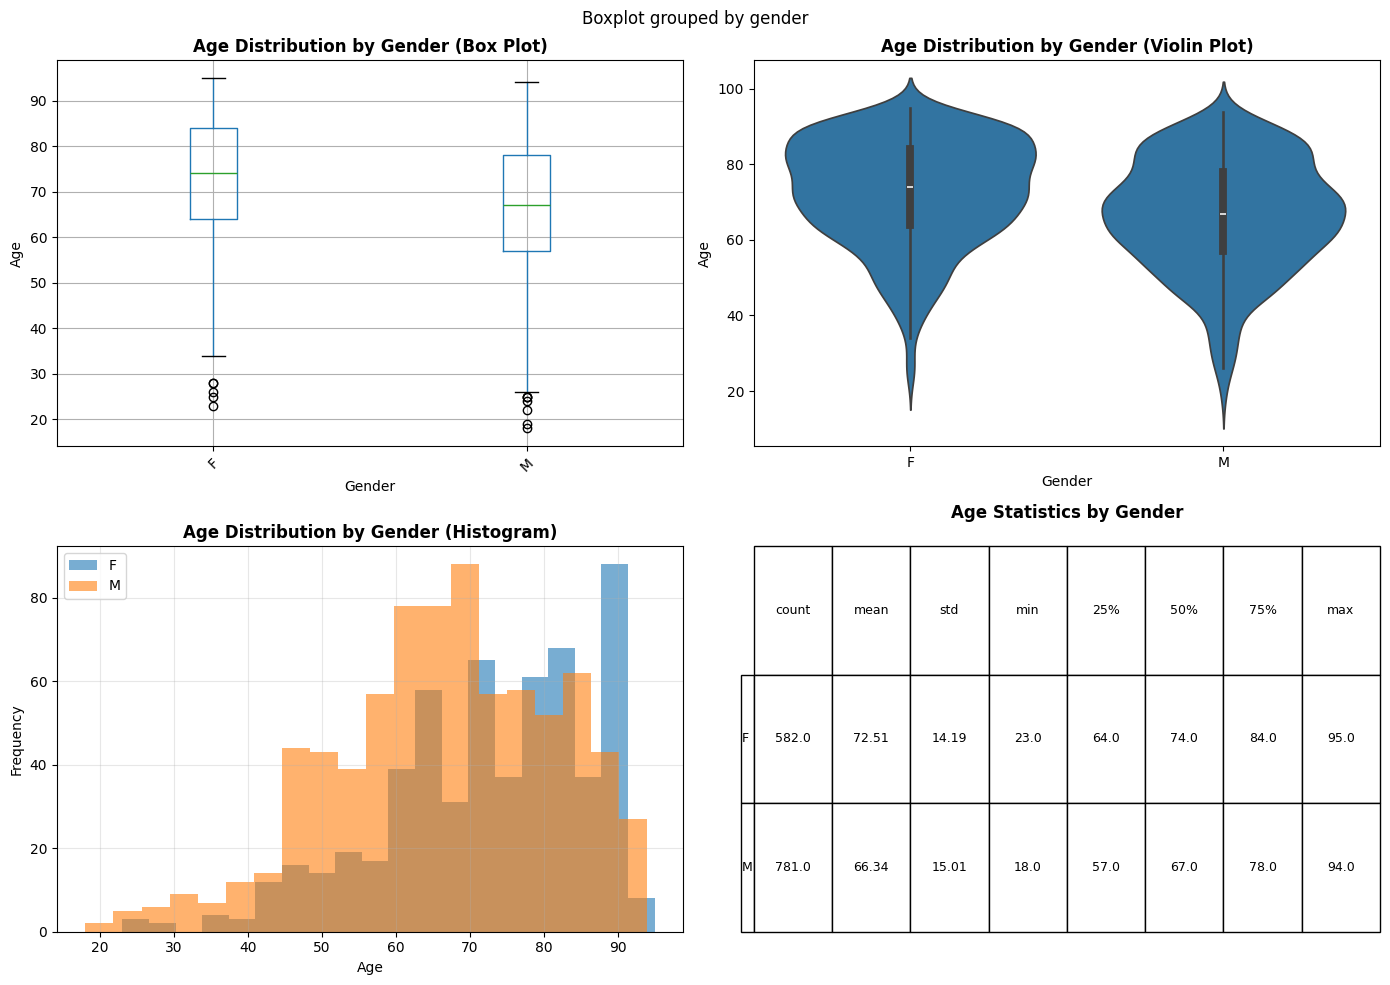


SUMMARY STATISTICS
        count       mean        std   min   25%   50%   75%   max
gender                                                           
F       582.0  72.513746  14.185359  23.0  64.0  74.0  84.0  95.0
M       781.0   66.34443  15.011036  18.0  57.0  67.0  78.0  94.0

AGE STATISTICS BY GENDER

F:
  Count: 582
  Mean: 72.51
  Median: 74.00
  Std Dev: 14.19
  Min: 23, Max: 95

M:
  Count: 781
  Mean: 66.34
  Median: 67.00
  Std Dev: 15.01
  Min: 18, Max: 94


In [49]:
print("="*80)
print("AGE DISTRIBUTION BY GENDER")
print("="*80)

# Check gender values
print(f"\nGender unique values: {df['gender'].unique()}")
print(f"Gender missing: {df['gender'].isna().sum()}")
print(f"\nGender value counts:")
print(df['gender'].value_counts(dropna=False))

# Create figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Box plot
ax1 = axes[0, 0]
df.boxplot(column='age', by='gender', ax=ax1)
ax1.set_title('Age Distribution by Gender (Box Plot)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Age')
plt.sca(ax1)
plt.xticks(rotation=45)

# 2. Violin plot
ax2 = axes[0, 1]
sns.violinplot(data=df, x='gender', y='age', ax=ax2)
ax2.set_title('Age Distribution by Gender (Violin Plot)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Age')

# 3. Histogram with overlaid distributions
ax3 = axes[1, 0]
for gender in df['gender'].dropna().unique():
    data = df[df['gender'] == gender]['age'].dropna()
    ax3.hist(data, alpha=0.6, label=gender, bins=20)
ax3.set_title('Age Distribution by Gender (Histogram)', fontsize=12, fontweight='bold')
ax3.set_xlabel('Age')
ax3.set_ylabel('Frequency')
ax3.legend()
ax3.grid(alpha=0.3)

# 4. Statistics table
ax4 = axes[1, 1]
ax4.axis('off')

# Calculate statistics by gender
stats_by_gender = df.groupby('gender')['age'].describe()
stats_by_gender = stats_by_gender.round(2)

# Create table
table = ax4.table(cellText=stats_by_gender.values,
                  colLabels=stats_by_gender.columns,
                  rowLabels=stats_by_gender.index,
                  cellLoc='center',
                  loc='center',
                  bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)
ax4.set_title('Age Statistics by Gender', fontsize=12, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('age_by_gender.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics
print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)
print(df.groupby('gender')['age'].describe())

print("\n" + "="*80)
print("AGE STATISTICS BY GENDER")
print("="*80)
for gender in df['gender'].dropna().unique():
    subset = df[df['gender'] == gender]['age'].dropna()
    print(f"\n{gender}:")
    print(f"  Count: {len(subset)}")
    print(f"  Mean: {subset.mean():.2f}")
    print(f"  Median: {subset.median():.2f}")
    print(f"  Std Dev: {subset.std():.2f}")
    print(f"  Min: {subset.min():.0f}, Max: {subset.max():.0f}")

#### plot icd code by gender and age

ANALYZE ICD CODE STRUCTURE

ICD code sample:
0     I50
1     I21
2     I21
3     I21
4     I35
5     I21
6     I25
7     I21
8     I50
9     I50
10    I21
11    I50
12    I48
13    I50
14    I21
15    I25
16    I25
17    I47
18    I25
19    I35
Name: icd_code, dtype: object

ICD code unique count: 20

ICD code missing: 0

ICD Chapter unique: 20
ICD Section unique: 20

Top ICD Chapters:
icd_chapter
I50    1447
I21    1434
I25     645
I48     438
I35     231
I31     153
I47     130
I30      83
I44      70
I34      50
Name: count, dtype: int64

AGE STATISTICS BY GENDER + ICD CODE

Filling missing age by (gender, icd_chapter)...
Filled 0 rows by (gender, icd_chapter)
Remaining missing: 3501


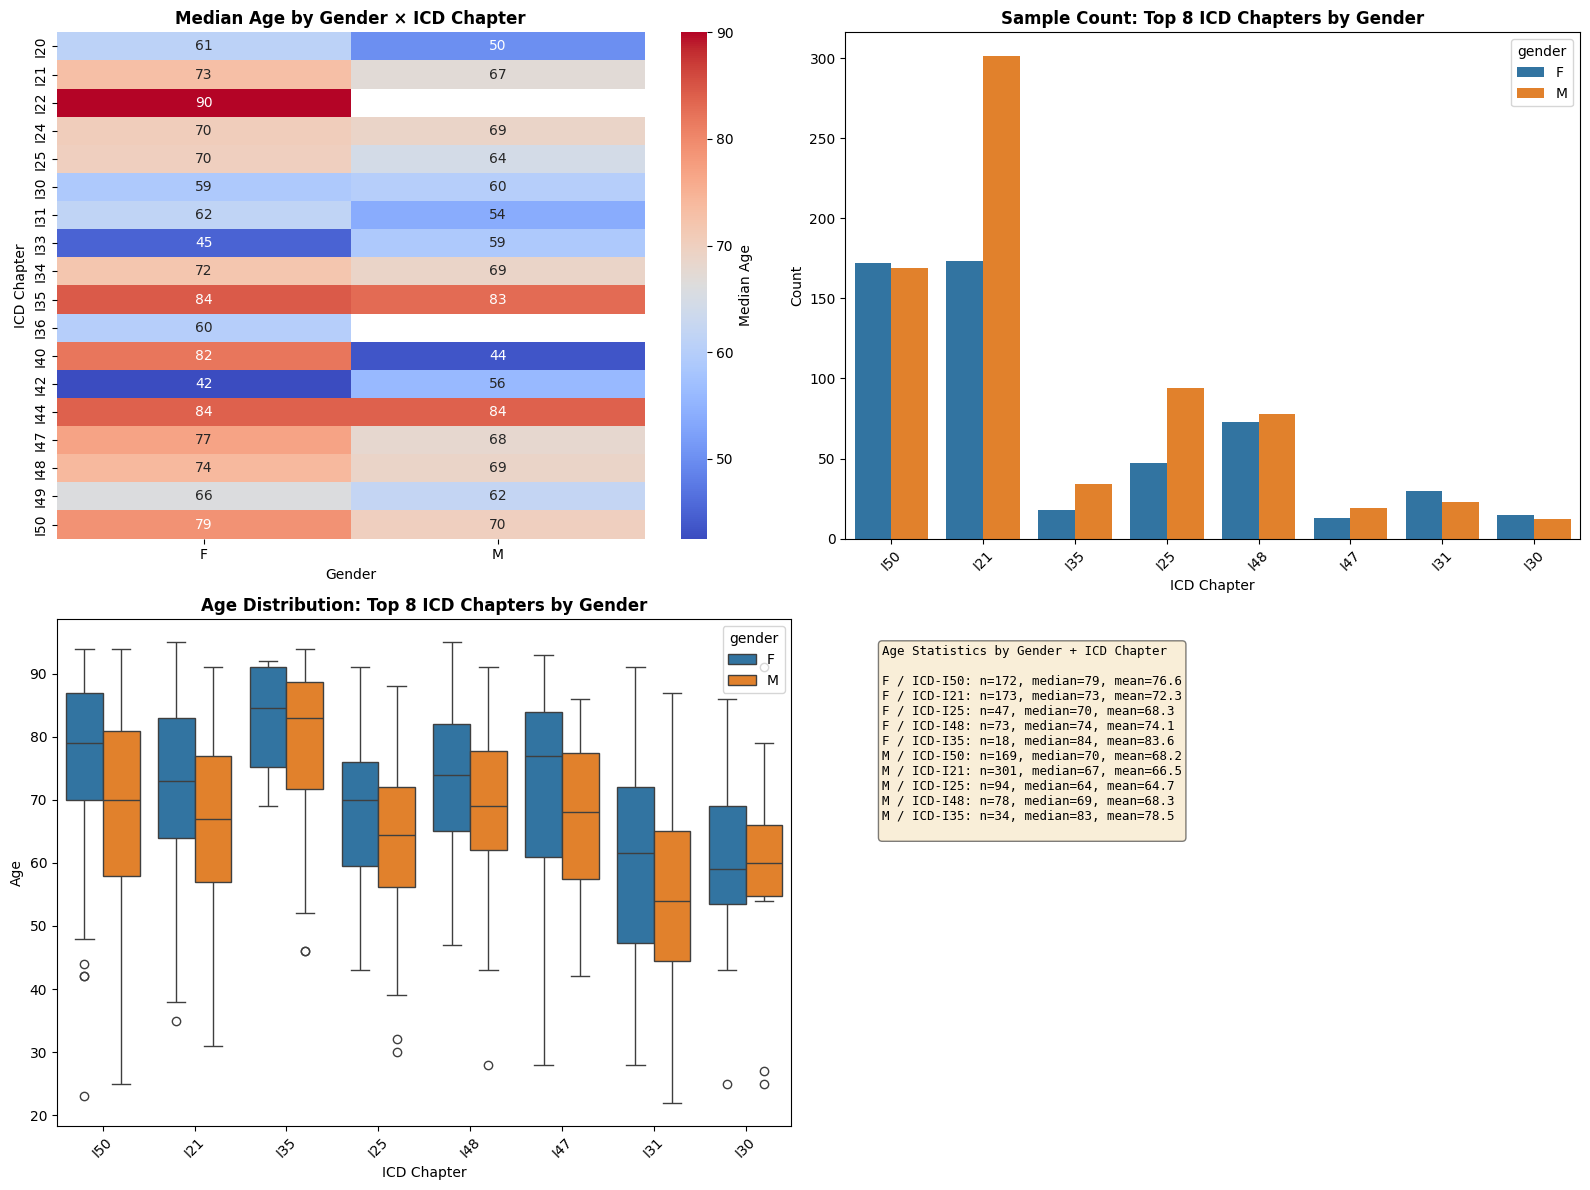


DETAILED: TOP 5 ICD CHAPTERS BY GENDER

F:
  ICD-I21 (n=173): median=73, mean=72.3, std=13.3
  ICD-I50 (n=172): median=79, mean=76.6, std=12.4
  ICD-I48 (n=73): median=74, mean=74.1, std=11.6
  ICD-I25 (n=47): median=70, mean=68.3, std=12.4
  ICD-I31 (n=30): median=62, mean=60.3, std=16.2

M:
  ICD-I21 (n=301): median=67, mean=66.5, std=13.5
  ICD-I50 (n=169): median=70, mean=68.2, std=15.6
  ICD-I25 (n=94): median=64, mean=64.7, std=12.3
  ICD-I48 (n=78): median=69, mean=68.3, std=12.7
  ICD-I35 (n=34): median=83, mean=78.5, std=13.2


In [52]:
## TODO infer age by gender and same icd code groupp => do a plto for that bc which gorup level of icd code?
print("="*80)
print("ANALYZE ICD CODE STRUCTURE")
print("="*80)

# Check ICD code format
print(f"\nICD code sample:")
print(df['icd_code'].head(20))
print(f"\nICD code unique count: {df['icd_code'].nunique()}")
print(f"\nICD code missing: {df['icd_code'].isna().sum()}")

# Extract ICD code hierarchy levels (ICD-9/10 typically: chapter.section.subsection)
df['icd_chapter'] = df['icd_code'].str.split('.').str[0]  # First level
df['icd_section'] = df['icd_code'].str.split('.').str[:2].str.join('.')  # First two levels

print(f"\nICD Chapter unique: {df['icd_chapter'].nunique()}")
print(f"ICD Section unique: {df['icd_section'].nunique()}")

print("\nTop ICD Chapters:")
print(df['icd_chapter'].value_counts().head(10))

print("\n" + "="*80)
print("AGE STATISTICS BY GENDER + ICD CODE")
print("="*80)

# Fill missing ages by gender + ICD chapter
print("\nFilling missing age by (gender, icd_chapter)...")
gender_icd_age_map = df[df['age'].notna()].groupby(['gender', 'icd_chapter'])['age'].agg(
    lambda x: x.median()
)

before_fill = df['age'].isna().sum()
for idx, row in df[df['age'].isna()].iterrows():
    key = (row['gender'], row['icd_chapter'])
    if key in gender_icd_age_map.index:
        df.loc[idx, 'age'] = gender_icd_age_map[key]

after_fill = df['age'].isna().sum()
print(f"Filled {before_fill - after_fill} rows by (gender, icd_chapter)")
print(f"Remaining missing: {after_fill}")

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Heatmap: Age by Gender x ICD Chapter
ax1 = axes[0, 0]
pivot_age = df.pivot_table(values='age', index='icd_chapter', columns='gender', aggfunc='median')

# Convert to float to handle nullable Int64 dtype
pivot_age = pivot_age.astype(float)

sns.heatmap(pivot_age, annot=True, fmt='.0f', cmap='coolwarm', ax=ax1, cbar_kws={'label': 'Median Age'})
ax1.set_title('Median Age by Gender × ICD Chapter', fontsize=12, fontweight='bold')
ax1.set_xlabel('Gender')
ax1.set_ylabel('ICD Chapter')

# 2. Count plot: Sample size by Gender x ICD Chapter (top 8)
ax2 = axes[0, 1]
top_icd_chapters = df['icd_chapter'].value_counts().head(8).index
df_top = df[df['icd_chapter'].isin(top_icd_chapters)]
sns.countplot(data=df_top, x='icd_chapter', hue='gender', ax=ax2)
ax2.set_title('Sample Count: Top 8 ICD Chapters by Gender', fontsize=12, fontweight='bold')
ax2.set_xlabel('ICD Chapter')
ax2.set_ylabel('Count')
plt.setp(ax2.get_xticklabels(), rotation=45)

# 3. Box plot: Age distribution by Gender for top ICD chapters
ax3 = axes[1, 0]
sns.boxplot(data=df_top, x='icd_chapter', y='age', hue='gender', ax=ax3)
ax3.set_title('Age Distribution: Top 8 ICD Chapters by Gender', fontsize=12, fontweight='bold')
ax3.set_xlabel('ICD Chapter')
ax3.set_ylabel('Age')
plt.setp(ax3.get_xticklabels(), rotation=45)

# 4. Statistics table
ax4 = axes[1, 1]
ax4.axis('off')

stats_text = "Age Statistics by Gender + ICD Chapter\n\n"
for gender in df['gender'].dropna().unique():
    for icd_ch in df['icd_chapter'].value_counts().head(5).index:
        subset = df[(df['gender'] == gender) & (df['icd_chapter'] == icd_ch)]['age'].dropna()
        if len(subset) > 0:
            stats_text += f"{gender} / ICD-{icd_ch}: n={len(subset)}, median={subset.median():.0f}, mean={subset.mean():.1f}\n"

ax4.text(0.05, 0.95, stats_text, transform=ax4.transAxes, fontsize=9,
         verticalalignment='top', family='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('age_by_gender_icd.png', dpi=300, bbox_inches='tight')
plt.show()

# Detailed statistics
print("\n" + "="*80)
print("DETAILED: TOP 5 ICD CHAPTERS BY GENDER")
print("="*80)

for gender in sorted(df['gender'].dropna().unique()):
    print(f"\n{gender}:")
    subset = df[df['gender'] == gender]
    top_icds = subset['icd_chapter'].value_counts().head(5)
    
    for icd_ch in top_icds.index:
        ages = df[(df['gender'] == gender) & (df['icd_chapter'] == icd_ch)]['age'].dropna()
        print(f"  ICD-{icd_ch} (n={len(ages)}): median={ages.median():.0f}, mean={ages.mean():.1f}, std={ages.std():.1f}")

In [ ]:
# check icd codes of missing ages and gender rows (Are the same rows)
missing_icd_codes = df.loc[missing_age_and_gender.index, 'icd_code']
print(f"\nICD codes for rows with missing age and gender: {missing_icd_codes.unique()}")    

### Gender
cant really be imputed realiably by icd_gorup for example, but check if icd_code infers sex:

In [57]:
print("="*80)
print("INFER MISSING GENDER FROM SEX-SPECIFIC ICD CODES")
print("="*80)

# Check missing gender
print(f"\nMissing gender values: {df['gender'].isna().sum()}")
display(df[df['gender'].isna()][['subject_id', 'hadm_id', 'gender', 'icd_code', 'icd_chapter', 'age']].head(10))

# Define sex-specific ICD code patterns (ICD-9 and ICD-10)
sex_specific_codes = {
    'M': [  # Male-specific conditions
        'C61',      # Prostate cancer (ICD-10)
        '185',      # Prostate cancer (ICD-9)
        'C62',      # Testicular cancer (ICD-10)
        '186',      # Testicular cancer (ICD-9)
        'N40',      # Benign prostate hyperplasia (ICD-10)
        '600',      # Benign prostate hyperplasia (ICD-9)
        'N41',      # Prostatitis (ICD-10)
        '601',      # Prostatitis (ICD-9)
        'N42',      # Prostate disorders (ICD-10)
        'N43',      # Hydrocele (ICD-10)
        '603',      # Hydrocele (ICD-9)
        'N44',      # Testicular torsion (ICD-10)
        '608',      # Testicular torsion (ICD-9)
        'Z12.11',   # Prostate screening (ICD-10)
        'Z90.79',   # Absence of prostate (ICD-10)
    ],
    'F': [  # Female-specific conditions
        'C53',      # Cervical cancer (ICD-10)
        '180',      # Cervical cancer (ICD-9)
        'C54',      # Endometrial cancer (ICD-10)
        '182',      # Endometrial cancer (ICD-9)
        'C56',      # Ovarian cancer (ICD-10)
        '183',      # Ovarian cancer (ICD-9)
        'C50',      # Breast cancer (ICD-10)
        '174',      # Breast cancer female (ICD-9)
        'N70',      # Salpingitis/oophoritis (ICD-10)
        '614',      # Salpingitis (ICD-9)
        'N71',      # Endometritis (ICD-10)
        'N72',      # Cervicitis (ICD-10)
        'N73',      # Female pelvic inflammatory disease (ICD-10)
        'N80',      # Endometriosis (ICD-10)
        '617',      # Endometriosis (ICD-9)
        'N81',      # Genital prolapse (ICD-10)
        'N84',      # Polyp of uterus (ICD-10)
        'N85',      # Uterine disorders (ICD-10)
        'N86',      # Erosion of cervix (ICD-10)
        'O',        # Pregnancy-related codes start with O (ICD-10)
        'Z34',      # Pregnancy supervision (ICD-10)
        'Z3A',      # Weeks of gestation (ICD-10)
    ]
}

# Fill missing gender from sex-specific ICD codes
before_fill = df['gender'].isna().sum()
filled_count = 0

for idx, row in df[df['gender'].isna()].iterrows():
    icd_code = str(row['icd_code'])
    
    # Check if ICD code matches male-specific conditions
    for male_code in sex_specific_codes['M']:
        if male_code in icd_code:
            df.loc[idx, 'gender'] = 'M'
            filled_count += 1
            break
    
    # Check if ICD code matches female-specific conditions (only if not already filled)
    if pd.isna(df.loc[idx, 'gender']):
        for female_code in sex_specific_codes['F']:
            if female_code in icd_code:
                df.loc[idx, 'gender'] = 'F'
                filled_count += 1
                break

after_fill = df['gender'].isna().sum()

print(f"\nFilled {filled_count} rows by sex-specific ICD codes")
print(f"Remaining missing gender: {after_fill}")

# Show inferred genders
if filled_count > 0:
    print("\n" + "="*80)
    print("SAMPLE OF INFERRED GENDERS")
    print("="*80)
    inferred_mask = ~(df[['subject_id', 'hadm_id', 'gender', 'icd_code']].duplicated(subset=['subject_id', 'hadm_id'], keep=False))
    display(df[inferred_mask][['subject_id', 'hadm_id', 'gender', 'icd_code']].head(15))

# Summary
print("\n" + "="*80)
print("GENDER SUMMARY")
print("="*80)
print(df['gender'].value_counts(dropna=False))
print(f"\nGender dtype: {df['gender'].dtype}")
print(f"Total missing: {df['gender'].isna().sum()}")

INFER MISSING GENDER FROM SEX-SPECIFIC ICD CODES

Missing gender values: 3501


,subject_id,hadm_id,gender,icd_code,icd_chapter,age
2,10002013,24760295,NaN,I21,I21,<NA>
3,10002155,23822395,NaN,I21,I21,<NA>
6,10010424,28388172,NaN,I25,I25,<NA>
7,10012343,27658045,NaN,I21,I21,<NA>
8,10013569,22891949,NaN,I50,I50,<NA>
9,10014651,20051301,NaN,I50,I50,<NA>
10,10017531,20668418,NaN,I21,I21,<NA>
11,10017886,20015927,NaN,I50,I50,<NA>
13,10023117,28872262,NaN,I50,I50,<NA>
14,10024331,27524226,NaN,I21,I21,<NA>



Filled 0 rows by sex-specific ICD codes
Remaining missing gender: 3501

GENDER SUMMARY
gender
NaN    3501
M       781
F       582
Name: count, dtype: int64

Gender dtype: object
Total missing: 3501


### Remove qc_flag == FAIL rows (?)

### Do scatterpltos / distr / etc to check for dataqualtiy